# Analyse de données de la configuration 11x11 du jeux Gomoku

Dans le but d'évaluer la performance de notre algorithme selon différentes configurations, nous avons produit des données en format csv pour la configuration 11x11.

### Alpha_Beta avec une profondeur de 1 et une limite de temps de 10 secondes 
Afin d'avoir un visuel sur les performances fournis, on décide de calculer en premier la moyenne de temps d'exécution des 20 parties jouées.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.special as sps 
import scipy.stats as stats 

from math import pow

#Calculer le temps total de jeu pour chaque game

game_times = []
score_heuristique_finaux = []
for i in range(1, 21):
    game_dataframe = pd.read_csv('./board_11X11/depth_1_timelimit_10/game{0}.csv'.format(i))
    
    if (game_dataframe.iloc[-1]["score_heuristique"] != 0):
        score_heuristique_finaux.append(abs(game_dataframe.iloc[-1]["score_heuristique"]))
        score_heuristique_finaux.append(abs(game_dataframe.iloc[-2]["score_heuristique"]))
    else:
        score_heuristique_finaux.append(abs(game_dataframe.iloc[-1]["score_heuristique"]))
    
    game_time = game_dataframe["duree_tour"].sum()
    game_times.append(game_time)

    # print("Game {0} : {1}s".format(i, format(game_time, ".2f")))

heuristique_finaux = pd.DataFrame(score_heuristique_finaux, columns=['heuristique_final'])
heuristique_finaux = heuristique_finaux.loc[~(heuristique_finaux==0).all(axis=1)]
heuristique_finaux

,heuristique_final
1,30000
2,10000
5,29321
6,41226
10,29696
11,10068
17,29634
18,10001
21,29712
22,10060


La moyenne d'un jeu complet de temps de jeux en seconde est:

In [2]:
format(np.mean(game_times), ".2f")

'16.71'

On peut aussi s'interesser à la moyenne et variance d'un seul coup. Pour se faire, on est mieu d'etudier le suivant par rapport à l'alignement le plus long réalisé et ainsi avoir des métriques plus juste car on sait que le plus qu'on avance dans le jeux le moins de choix s'offre à nous. Ainsi, on peut calculer la moyenne et variance pour le jeux de données présent selon l'allignement le plus long.

In [3]:
alignement_data = {}

for i in range(1, 21):
    game_dataframe = pd.read_csv('./board_11X11/depth_1_timelimit_10/game{0}.csv'.format(i))
    
    for index, row in game_dataframe.iterrows():
#         print(row["allignement_plus_long"])
        if(not row["allignement_plus_long"] in alignement_data):
            alignement_data[row["allignement_plus_long"]] = []
            
        alignement_data[row["allignement_plus_long"]].append(row["duree_tour"])
            
alignement_stats = {}
a = np.array([14, 8, 11, 10, 7, 9, 10, 11, 10, 15, 5, 10])
print(np.var(alignement_data[1]))


# for key in alignement_data.keys():
#     alignement_stats[key] = {"moyenne": format(np.mean(alignement_data[key]), ".2f"), "variance": format(np.var(alignement_data[key]), ".2f")}
    
    

# print(alignement_stats)
            
#     game_time = game_dataframe["duree_tour"].sum()
#     game_times.append(game_time)

#     print("Game {0} : {1}s".format(i, format(game_time, ".2f")))

2.792735678139599e-05


Une autre métrique intéressante à consulter est la distribution du score de l'heuristique final du jeu pour mieux comprendre l'aboutissement du jeu soit à un match nul ou menant à un vainceur. Pour ce faire, on peut consulter les données en forme d'un histogramme

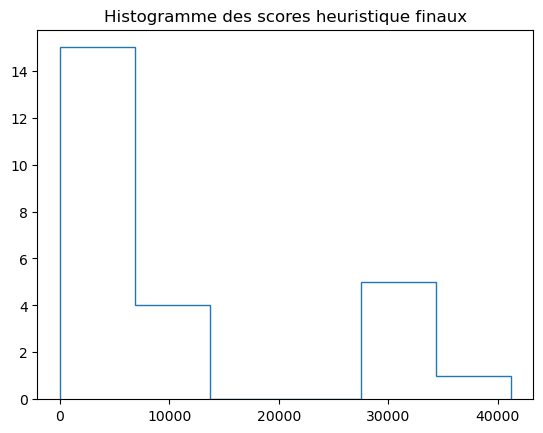

In [4]:
counts, bins = np.histogram(score_heuristique_finaux, bins='auto')
plt.stairs(counts, bins)
plt.title("Histogramme des scores heuristique finaux")
plt.show()

On peut tracer la distribution theorique suivant une loi Gamma pour représenter la distribution du score de l'heuristique finaux. Ceci dit, on doit d'abord calculer son paramètre de distribution λ et donc évaluer la moyenne calculé en premier.

3.8685246032402776
5938.129482428213


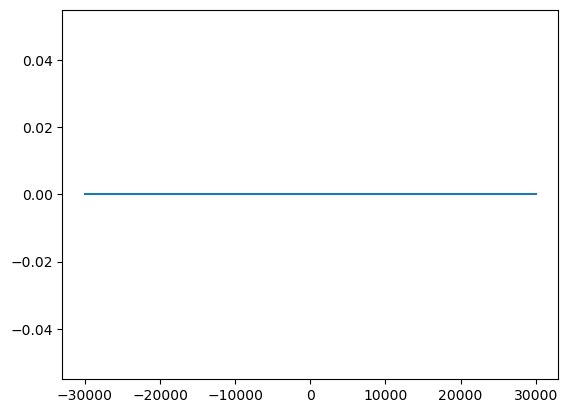

In [5]:
# test = np.mean(score_heuristique_finaux)
# print("Moyenne score heuristique: {0}".format(test))
# gamma_lambda = len(score_heuristique_finaux) / test
# print("{0}: {1}".format(u'\u03BB', gamma_lambda))

mean = heuristique_finaux.mean()
variance = heuristique_finaux.var()

alpha = abs((pow(mean, 2)/variance)['heuristique_final'])
print(alpha)
beta = abs((variance/mean)['heuristique_final'])
print(beta)
scale = 1/beta

x = np.linspace (-30000, 30000, 200)
y = stats.gamma.pdf(x, a=alpha, scale=scale)

plt.plot(x, y)
plt.show()

In [6]:
# y = stats.gamma.pdf(score_heuristique_finaux, len(score_heuristique_finaux), scale=gamma_lambda)
# plt.plot(score_heuristique_finaux, y)
# plt.show()